In [1]:
import sys
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pathlib import Path
sys.executable

'C:\\Users\\Os\\AppData\\Local\\Programs\\Python\\Python310\\python.exe'

Demonstration of each model

Geometric Brownian Motion 

In [7]:
from gmm.base_models.gbm import GeometricBrownianMotion
from gmm.models.gbm_gmm import GBM_GMM

In [29]:
mu_true = 0.05
sigma_true = 0.20
gbm_true = GeometricBrownianMotion(T=1, N=252, S0=1.0, mu=mu_true, sigma=sigma_true)
S = gbm_true.simulate()
gbm_naive = GeometricBrownianMotion(T=1, N=252, S0=1.0,mu=0.02, sigma=0.10)
S_naive = gbm_naive.simulate()
print('initial mean :', mu_true)
print('initial volatility :', sigma_true)

initial mean : 0.05
initial volatility : 0.2


In [30]:
gmm = GBM_GMM(dt=1/252, verbose=True)
res = gmm.fit(pd.Series(np.ndarray.flatten(S)))
mu, sigma = res.params_
print(mu, sigma)
gbm_gmm = GeometricBrownianMotion(T=1, N=252, S0=1.0,mu=mu, sigma=sigma)
S_gmm = gbm_gmm.simulate()

GBM GMM calibration complete
mu    = 260.905218
sigma = -2.354362
J-stat= 5.089584e-10
260.905218411837 -2.3543619368803523


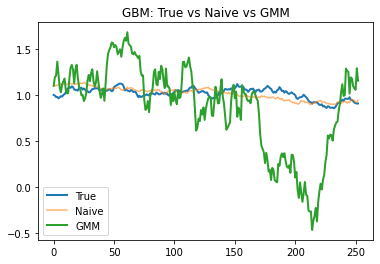

In [124]:
plt.plot(S[1], label="True", lw=2)
plt.plot(S_naive[1], label="Naive", alpha=0.6)
plt.plot(S_gmm[1], label="GMM", lw=2)
plt.legend(); plt.title("GBM: True vs Naive vs GMM")
plt.show()

Vasicek an HoLee

In [145]:
from gmm.base_models.vasicek_ho_lee import Vasicek_HoLee
from gmm.models.vasicek_ho_lee_gmm import VasicekHoLee_GMM

In [146]:
T = 252 * 5 
dt = 1/252
r_t = np.random.lognormal(mean=-3.5, sigma=0.3, size=T)
r0 = r_t[-1] 

In [149]:
a_true     = 0.8
theta_true = 0.04
sigma_true = 0.02
model = Vasicek_HoLee(T=30,N=300,r0=r0)
model.a = a_true
model.theta = theta_true
model.sigma = sigma_true

In [152]:
spot_yields = []
for tau in maturities:
    A, B = model.get_A_B(t=len(r_t), T_mat = T )
    y_tau = A - B * r0
    spot_yields.append(y_tau)
spot_yields = np.array(spot_yields)
print(spi

[1. 1. 1. 1. 1. 1. 1. 1.]


In [154]:
gmm = VasicekHoLee_GMM(maturities=maturities,spot_rates=spot_yields,model_type="vasicek",verbose=True)
res = gmm.fit(estimate_sigma=True)
print(res)

TypeError: VasicekHoLee_GMM.__init__() got an unexpected keyword argument 'verbose'

In [95]:
gmm = VasicekHoLee_GMM(maturities=maturities,spot_rates=spot_rates,dt=1/252,verbose=True)
res = gmm.fit_gmm()
print(res)

NameError: name 'spot_rates' is not defined

In [41]:
from gmm.base_models.foreign_domestic_pricing import ForexModel
from gmm.models.foreign_domestic_gmm import ForeignDomestic_GMM

In [48]:
S0 = 1
Q0 = 1.1
alpha = 0.0
gamma = -0.01
sigma1 = 0.10
sigma2 = 0.15
r = 0.03
rf = 0.01
rho = 0.5

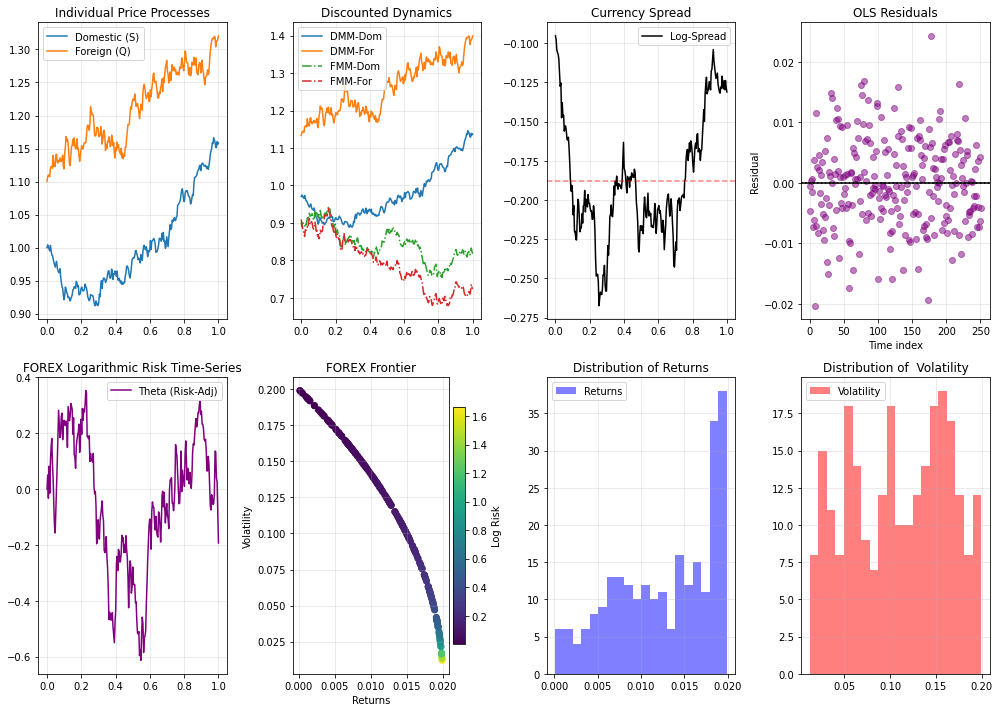

        0         1         2         3         4         5         6    \
0  1.000000  0.995787  0.983691  0.978854  0.982503  0.982865  0.997010   
1  1.100000  1.101174  1.092612  1.095039  1.101297  1.110100  1.123870   
2  1.133500  1.134742  1.124978  1.127622  1.134611  1.144552  1.160330   
3  0.970446  0.966404  0.954823  0.950253  0.953765  0.954148  0.967779   

        7         8         9    ...       243       244       245       246  \
0  1.008515  1.008333  1.013003  ...  0.880644  0.883555  0.867555  0.876615   
1  1.132012  1.129102  1.130338  ...  1.063286  1.063452  1.057075  1.061587   
2  1.169723  1.166231  1.167581  ...  1.071769  1.071862  1.064963  1.069694   
3  0.979016  0.978877  0.983497  ...  0.869608  0.872177  0.858368  0.866214   

        247       248       249       250       251       252  
0  0.881573  0.878890  0.878786  0.876493  0.881217  0.872574  
1  1.062432  1.063038  1.072073  1.057660  1.054768  1.042753  
2  1.070514  1.071078  1.080714

In [67]:
fx_true = ForexModel(T=1, N=252)
S_true= fx_true.simulate_domestic(S0, Q0, r, rf, gamma, alpha, sigma1, sigma2, rho)
Q_true= fx_true.simulate_domestic(S0, Q0, r, rf, gamma, alpha, sigma1, sigma2, rho)
fx_true.plot_forex_analysis(S0, Q0, r, rf, gamma, alpha, sigma1, sigma2, rho)
print(pd.DataFrame(S_true))

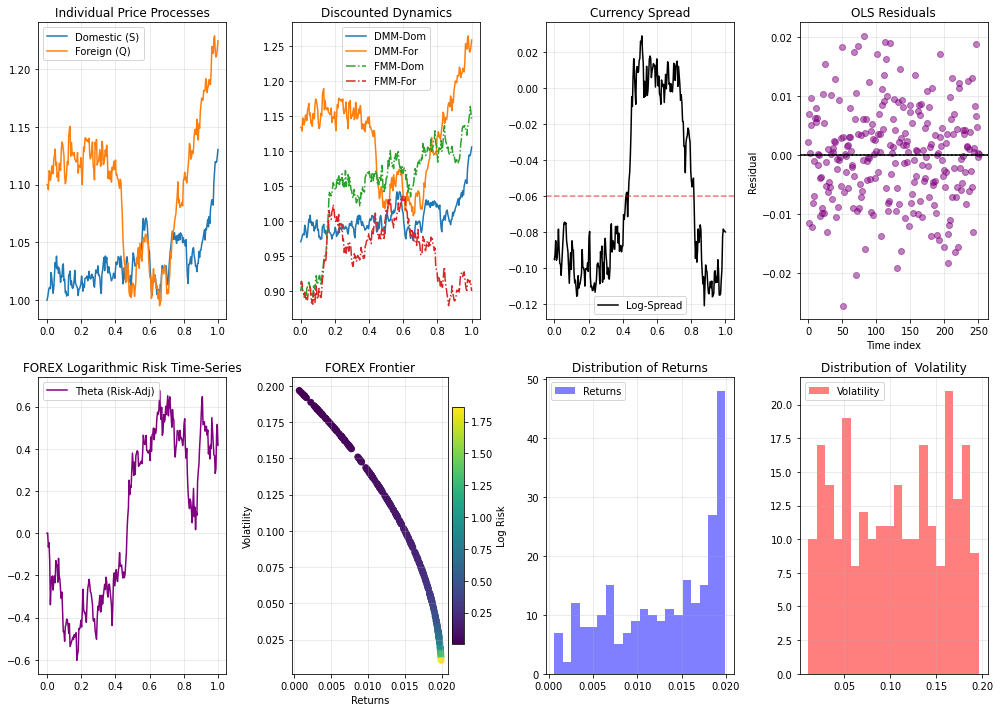

In [62]:
fx_naive = ForexModel(T=1, N=252)
S_naive= fx_naive.simulate_domestic(S0, Q0, r, rf, gamma, alpha, sigma1, sigma2, rho)
Q_naive= fx_naive.simulate_domestic(S0, Q0, r, rf, gamma, alpha, sigma1, sigma2, rho)
fx_naive.plot_forex_analysis(S0, Q0, r, rf, 0, alpha, sigma1, sigma2, rho)


Foreign–Domestic Two-Step GMM calibration complete
alpha  = -2.520064
gamma  = -2.535986
sigma1 = 1.692586
sigma2 = 1.758357
J-stat = 2.125230e-11


C:\Users\Os\PycharmProjects\quantgmm\gmm\base_models\foreign_domestic_pricing.py:87: RuntimeWarning: invalid value encountered in log
  spread = log(S) - log(Q)
C:\Users\Os\PycharmProjects\quantgmm\gmm\base_models\foreign_domestic_pricing.py:88: RuntimeWarning: invalid value encountered in log
  fx_logrets = np.diff(np.log(S / Q))


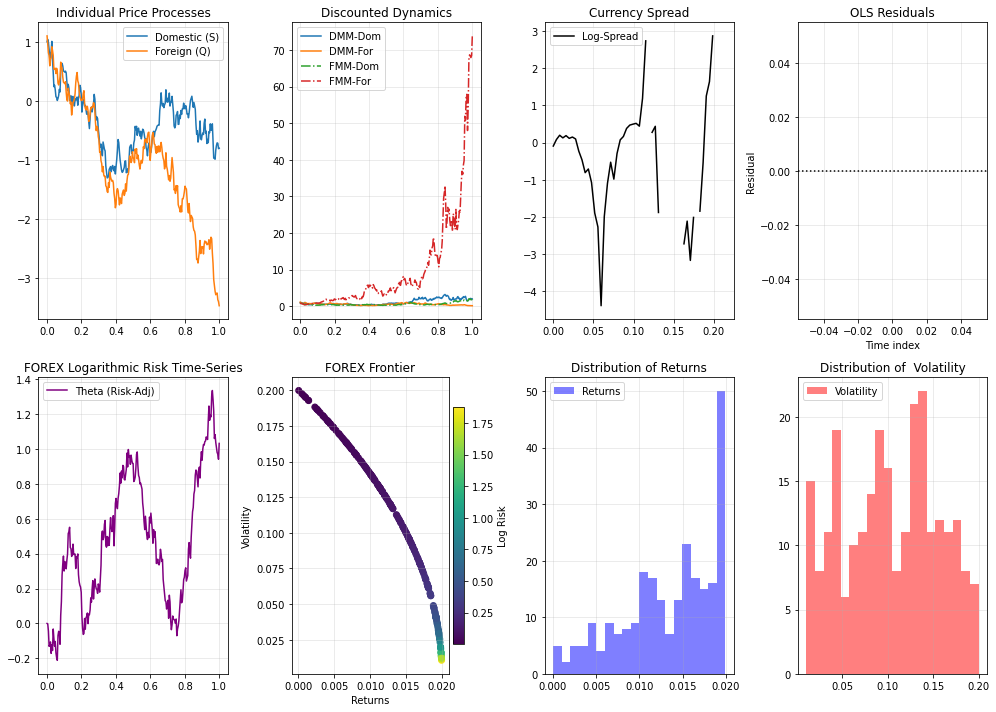

In [73]:
gmm = ForeignDomestic_GMM(r=r, rf=rf, dt=1/252, verbose=True)
res = gmm.fit_gmm(pd.DataFrame(S_true), pd.DataFrame(Q_true))
fx_gmm = ForexModel(T=1, N=252)
alpha_gmm, gamma_gmm, sigma1_gmm, sigma2_gmm = res['alpha'], res['gamma'], res['sigma1'], res['sigma2']
S_gmm= fx_naive.simulate_domestic(S0, Q0, r, rf, gamma_gmm, alpha_gmm, sigma1_gmm, sigma2_gmm, rho)
Q_gmm= fx_naive.simulate_domestic(S0, Q0, r, rf, gamma_gmm, alpha_gmm, sigma1_gmm, sigma2_gmm, rho)
fx_gmm.plot_forex_analysis(S0, Q0, r, rf, gamma_gmm, alpha_gmm, sigma1_gmm, sigma2_gmm, rho)

Aggregated Equity Data as an empirical toy test

In [25]:
data_path = Path('gmm/datas/global_equity_ticker.csv')
df = pd.read_csv(data_path)
df.head

<bound method NDFrame.head of                  ID        DATE CURRENCY   PX_LAST
0      MEXBOL Index  2021-01-25      MXN  45126.52
1      MEXBOL Index  2021-01-26      MXN  45053.56
2      MEXBOL Index  2021-01-27      MXN  44262.01
3      MEXBOL Index  2021-01-28      MXN  44280.73
4      MEXBOL Index  2021-01-29      MXN  42985.73
...             ...         ...      ...       ...
36535     SMI Index  2026-01-21      CHF  13156.81
36536     SMI Index  2026-01-22      CHF  13228.40
36537     SMI Index  2026-01-23      CHF  13147.13
36538     SMI Index  2026-01-24      CHF  13147.13
36539     SMI Index  2026-01-25      CHF  13147.13

[36540 rows x 4 columns]>

In [ ]:
df['Date'] = pd.to_datetime(df["DATE"])
df = df.sort_values("DATE")
px = df.set_index("DATE")["PX_LAST"].astype(float)
px.plot(title='Global equity index')

DATE
2021-01-27    0.718331
2021-01-28   -0.257319
2021-01-28    0.987298
2021-01-28    0.275411
2021-01-28    1.431424
                ...   
2026-01-25   -0.632851
2026-01-25   -1.715418
2026-01-25    1.187280
2026-01-25   -0.580149
2026-01-25   -0.208908
Name: PX_LAST, Length: 36481, dtype: float64


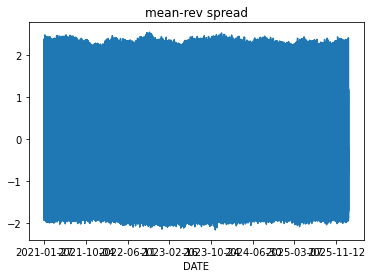

In [6]:
#log values
log_px = np.log(px)
spread = log_px - log_px.rolling(60).mean()
spread = spread.dropna()
spread.plot(title='mean-rev spread')
print(spread)

In [7]:
#parameters
dt = 1/252
x = spread.values
print(x)

[ 0.71833056 -0.25731944  0.98729813 ...  1.18728016 -0.58014905
 -0.20890821]


In [8]:
from gmm.base_models.general_ou import OU
from gmm.models.ou_gmm import OU_GMM

In [9]:
ou_gmm = OU_GMM(dt=dt, verbose=True)
ou_gmm.fit(x)


OU GMM calibration complete
kappa = 263.750828
theta = 0.000342
sigma = 37.093790
J-stat = 8.583330e-15


OU_GMM(verbose=True)

In [20]:
x_t = x[:-1]
x_tp1 = x[1:]
print(x_tp1)

[-0.25731944  0.98729813  0.2754109  ...  1.18728016 -0.58014905
 -0.20890821]


In [21]:
kappa_gmm, theta_gmm, sigma_gmm = ou_gmm.params_
print(kappa_gmm, theta_gmm, sigma_gmm)

263.7508281799459 0.0003419111573006652 37.09379002011565


In [22]:
x0 = spread.iloc[-1]
ou_gmm_sim = OU(x0, kappa_gmm, theta=theta_gmm, sigma=sigma_gmm)

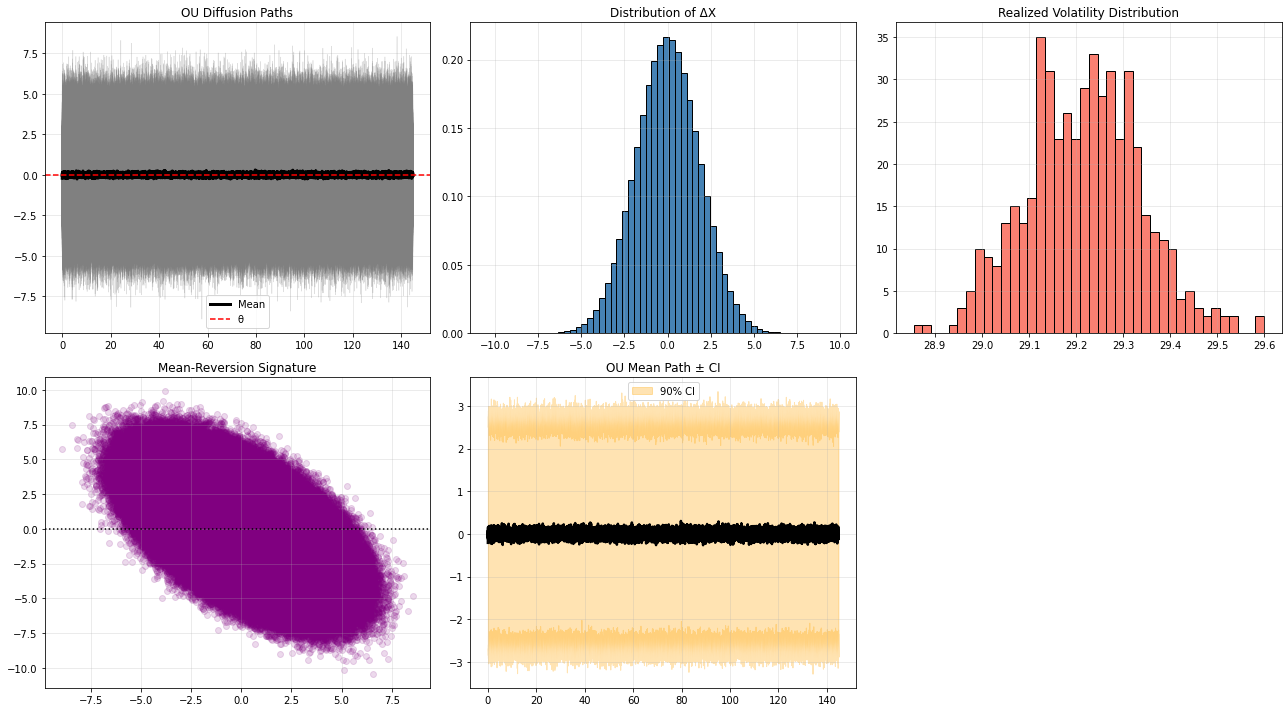

In [23]:
ou_gmm_sim.plot_diagnostics(T=len(spread), paths=500, seed=42)